# E-Commerce: Product Range Analysis

# Project goal:
Analysis of product range of home appliances online store in order to identify trending items by analyzing top-selling products and the revenue they bring. Additionally, the goal is to identify products “from the lowest shelf” with low sales and profitability, in order to maximize profitability and effectiveness. Identify products which have high potential to increase revenue. Based on the analysis, the management will make decisions regarding marketing strategy to boost sales and profit from the top-selling products and possibly modify the product range by cutting the low selling products.

# Hypotheses: 
1.	The top-selling trending products will be sold often with a short time gap between the sales and will be trending for a prolonged period of time. The low-selling products will be sold rarely and there will be long time gaps between the sales. The products that are not selling will have long time since the last purchase.
2.	The top-selling products will show greater growth dynamics than average for the sample. The low-selling products will show lower growth dynamics than average for the sample.
3.	The top-selling products will point towards trends and customer demand in general and toward seasonal demand, in particular.
4.  Trending products from the same product category are often sold together in one purchase.
5.	There’s seasonality in purchasing trends. The baskets tend to be larger, more expensive and include more items right before the holidays.  In when the the length of light day gets shorter, people tend to spend more time shopping online, and spend more.

# Tasks: 
1.	Identify most trending products and low selling products in the online store product range and find products that are often sold together. 
2.	Identify product seasonality.

# Plan of action:  

**Step 1: Data preprocessing**
-	Study missing values
-	Study type correspondence
-	Study duplicate values
-	Check the correctness of column names
-	Rename the columns
-	Study duplicates
-	Change values in ‘Description’ column to lower case
-	Explore negative values
-	Enrich the data: year of purchase, month of purchase, season (summer, spring, fall, winter)  

**Step 2: Exploratory data analysis**
-	Analyze and treat missing values
-	Treat wrong data types
-	Remove duplicates
-	Rename the columns
-	Treat negative values
-	Explore the data with describe() method
-	Calculate total revenue over time and create a visualization
-	Create scatterplot to study price and item quantity per purchase distribution
-	Calculate total number of items purchased over time and create visualization
-	Look at item quantity distribution per purchase and study outliers
-	Look at item price distribution and study outliers
-	Study core metrics without outliers

**Step 3: Product Range Analysis**  

   **3.1 Top selling and low selling products:**  
-   For each product, find the average time between the purchases, the date of the last purchase, the trending period: time between the first purchase and the last purchase.
-	Find the top-ten most selling products in terms of number of items sold and the products with the highest revenue.
-	Calculate total revenue brought by the 10 top-selling products.
-	Look at how were the top-selling products changing over time? Plot a graph.
-	Find the 10 least sold products – by items and revenue.
-	Calculate total revenue brought by the 10 least selling products.
-	Look at how were the low selling products changing over time? Plot a graph.
-	Look into the relationship between revenue growth and trending behavior – the popularity of the products.
-	Calculate the share of the products which haven’t been sold for the past month, six months, a year.



 **3.2	Basket analysis**   
    Conduct basket analysis:
-	Find the average basket size (price and number of items)
-	What products are often sold together?

   **3.3	Seasonality:**
-	Find the top-ten most selling products for EACH MONTH.
-	Find the average basket size (number or items and total revenue) for each month.
-	Compare the findings.   

**Step 4: Testing hypotheses inside the product range analysis**
- Do customers purchase more items on average during summer season or winter season? (Holidays season?) Compare average basket sizes (quantity and basket cost)    

**H0** – There’s no difference between seasons in the basket size.  
**H1** – There’s a difference between seasons in the basket size.

**Step 5: Make conclusions based on hypotheses**

# [Project Presentation](https://drive.google.com/file/d/1a6YjX_05cVMoQTULXGnhTsBQKvNYdAWH/view?usp=sharing)

[TABLEAU DASHBOARD](https://public.tableau.com/views/TotalNumberofPurchasesandPurchaseTotalDistributionDashboard/Dashboard2?:language=en-US&:display_count=n&:origin=viz_share_link)

## Loading and reading the data

In [1]:
!pip install sidetable

In [2]:
pip install mlxtend==0.19.0

     |████████████████████████████████| 1.3 MB 13.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
# importing relevant libraries
import pandas as pd
import numpy as np
pd.options.display.max_colwidth = 210
from datetime import datetime
import scipy.stats as stats
import datetime as dt
import sidetable
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import math as mth
import seaborn
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings(action='ignore')
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from itertools import combinations
from collections import Counter
from itertools import cycle, islice

In [4]:
sns.set(style="darkgrid", color_codes=True)
pd.set_option('display.max_columns', 75)
c = '#7eb54e'
cc = "#ccdcfe"
ccc = sns.color_palette("husl", 9)

In [6]:
#downloading and reading the dataset
ecomm = pd.read_csv('/datasets/ecommerce_dataset_us.csv', sep= '\t', converters={'Description': str.strip})
ecomm.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


In [7]:
#exlploring the dataset sample - last 5 rows
ecomm.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/07/2019 12:50,0.85,12680.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/07/2019 12:50,2.10,12680.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/07/2019 12:50,4.15,12680.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/07/2019 12:50,4.15,12680.0
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/07/2019 12:50,4.95,12680.0


In [8]:
#exploring data types and missing values
ecomm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  541909 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


- InvoiceDate column has an incorrect datatype and should be converted to datetime type.  
- Description and CustomeID columns have missing values.  
- CustomerId has missing values and is a float type. However, singe we are performing product less analysis in this research and will not be interested in invividual customers, we most probably will not be needing this column. It will be left as is.

In [9]:
#exploring numaric data values - min,max, mean, and median
ecomm.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


1. Quantity and UnitPrice columns have very big std and quite large gaps between mean and median values. This should be investigated. 
2. Quantity and UnitPrice columns have negative values. This should be investigated.

## Data Preprocessing

### Renaming columns

In [10]:
#checking column names
print(ecomm.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID'],
      dtype='object')


The columns should be renamed to avoid mistakes.

In [11]:
ecomm.columns = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'customer_id']
print(ecomm.columns)

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id'],
      dtype='object')


### Total purchases and total items

#### Stock_code column values

In [12]:
ecomm['stock_code'].nunique()

4070

There're 4,070 unique stock codes. Let's explore them and look closely what we can learn.

In [13]:
#looking at stock code values one by one
code_unique = ecomm['stock_code'].sort_values(ascending=False).unique()
for i in code_unique:
    print (i)

m
gift_0001_50
gift_0001_40
gift_0001_30
gift_0001_20
gift_0001_10
S
POST
PADS
M
DOT
DCGSSGIRL
DCGSSBOY
DCGS0076
DCGS0074
DCGS0073
DCGS0072
DCGS0071
DCGS0070
DCGS0069
DCGS0068
DCGS0067
DCGS0066P
DCGS0057
DCGS0055
DCGS0004
DCGS0003
D
CRUK
C2
BANK CHARGES
B
AMAZONFEE
90214Z
90214Y
90214W
90214V
90214U
90214T
90214S
90214R
90214P
90214O
90214N
90214M
90214L
90214K
90214J
90214I
90214H
90214G
90214F
90214E
90214D
90214C
90214B
90214A
90212C
90212B
90211B
90211A
90210D
90210C
90210B
90210A
90209C
90209B
90209A
90208
90206C
90206A
90205C
90205A
90204
90202D
90202C
90202B
90202A
90201D
90201C
90201B
90201A
90200E
90200D
90200C
90200B
90200A
90199D
90199C
90199B
90199A
90198B
90198A
90197B
90196B
90196A
90195B
90195A
90194
90192
90191
90190C
90190B
90190A
90189A
90188
90187B
90187A
90186B
90186A
90185D
90185C
90185B
90185A
90184c
90184C
90184B
90184A
90183c
90183C
90183B
90183A
90182C
90182B
90182A
90181C
90181B
90181A
90180B
90180A
90179C
90179B
90179A
90178B
90178A
90177E
90177D
90177C
90177

#### Description column values

In [14]:
#looking at values in "Description" column
ecomm['description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [15]:
ecomm['description'].nunique()

4212

There're 4,212 unique item desription values.The 'description' column values should be converted to lower case to avoid possible duplicates.

In [16]:
ecomm['description'] = ecomm['description'].str.lower()
ecomm['description'].nunique()

4195

After converting all values to lower case, there're 4,195 unique item descriptions, which is still more than the number of unique item stock codes. This should be investigated. Possibly, once the non-product items will be removed, the numbers will even out. Also we should check implicite duplicates.

In [247]:
duplicates_list = ecomm.groupby(['stock_code'])['description'].nunique().sort_values(ascending=False).reset_index().query('description !=1')['stock_code'].to_list()

In [249]:
desc_dubble = ecomm.query('stock_code in @duplicates_list')['description'].sort_values(ascending=False).unique()
for i in desc_dubble:
    print (i)

zinc top  2 door wooden shelf
zinc t-light holder stars large
zinc t-light holder star large
zinc star t-light holder
zinc plant pot holder
zinc herb garden container
zinc hearts plant pot holder
zinc heart lattice tray oval
zinc folkart sleigh bells
zinc finish 15cm planter pots
zinc  star t-light holder
yuletide images gift wrap set
you're confusing me metal sign
yellow/pink flower design big mug
yellow/orange flower design plate
yellow shark helicopter
yellow pot plant candle
yellow pink flower design big bowl
yellow metal chicken heart
yellow flowers felt handbag kit
yellow felt hanging heart w flower
yellow dragonfly helicopter
yellow breakfast cup and saucer
wrongly sold sets
wrongly sold as sets
wrongly sold (22719) barcode
wrongly mrked had 85123a in box
wrongly marked. 23343 in box
wrongly marked carton 22804
wrongly marked 23343
wrongly marked
wrongly coded-23343
wrongly coded 23343
wrongly coded 20713
wrong code?
wrong code
wrong barcode (22467)
wrong barcode
wrap, carousel


In [ ]:
ecomm.loc[ecomm['stock_code'].isin(list), 'Age Category'] = 'Under 30'

In [17]:
#looking at description values one by one
name_unique = ecomm['description'].sort_values(ascending=False).unique()
for i in name_unique:
    print (i)

zinc wire sweetheart letter tray
zinc wire kitchen organiser
zinc willie winkie  candle stick
zinc top  2 door wooden shelf
zinc t-light holder stars small
zinc t-light holder stars large
zinc t-light holder star large
zinc sweetheart wire letter rack
zinc sweetheart soap dish
zinc star t-light holder
zinc plant pot holder
zinc metal heart decoration
zinc herb garden container
zinc hearts plant pot holder
zinc heart lattice tray oval
zinc heart lattice t-light holder
zinc heart lattice charger small
zinc heart lattice charger large
zinc heart lattice 2 wall planter
zinc heart flower t-light holder
zinc folkart sleigh bells
zinc finish 15cm planter pots
zinc box sign home
zinc  star t-light holder
zinc  heart t-light holder
yuletide images s/6 paper boxes
yuletide images gift wrap set
you're confusing me metal sign
yellow/pink flower design big mug
yellow/pink ceramic candle holder
yellow/orange flower design plate
yellow/blue retro radio
yellow shark helicopter
yellow pot plant candle


- There're several stock codes, which indicate that the items are not real product items. The codes are: 'DOT', 'M', 'm', 'POST', 'BANK CHARGES', 'AMAZONFEE', 'B', 'CRUK', 'D'. 
- There's a number of items description which indicate that the item is not a product.
We will make two lists: codes and descriptions - in order to exclude these items later from the dataset.

In [18]:
ecomm[ecomm['description'] == 'returned']

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
166646,550951,84531A,returned,2,04/19/2019 16:15,0.0,NaN
166647,550952,84531B,returned,2,04/19/2019 16:16,0.0,NaN


We see that there's only two rows with returns.

In [19]:
#Creating lists to be excluded from the dataset for product range analysis
code_exclude_list = ['DOT', 'M', 'm', 'POST', 'S', 'BANK CHARGES', 'AMAZONFEE', 'B', 'CRUK', 'D']
desc_exclude_list = ['20713 wrongly marked',
'20713',
'?sold as sets?',
'?missing',
'?lost',
'?display?',
'???missing',
'???lost',
'????missing',
'????damages????',
'???',
'?? missing',
'??',
'? sold as sets?',
'?',
'wrongly sold sets',
'wrongly sold as sets',
'wrongly sold (22719) barcode',
'wrongly marked. 23343 in box',
'wrongly marked carton 22804',
'wrongly marked 23343',
'wrongly marked',
'wrongly coded-23343',
'wrongly coded 23343',
'wrongly coded 20713',
'wrong code?',
'wrong code',
'wrong barcode (22467)',
'wrong barcode',
'wet?',
'wet/rusty',
'wet rusty',
'wet pallet',
'wet damaged',
'wet boxes',
'wet',
'website fixed',
'water damaged',
'water damage',
'to push order througha s stock was ',
"thrown away-can't sell.",
"thrown away-can't sell",
'thrown away',
'throw away',
'test',
'temp adjustment',
'taig adjust no stock',
'taig adjust',
'stock creditted wrongly',
'stock check',
'sold with wrong barcode',
'sold in set?',
'sold as set/6 by dotcom',
'sold as set on dotcom and amazon',
'sold as set on dotcom',
'sold as set by dotcom',
'sold as 22467',
'sold as 1',
'smashed',
'showroom',
'samples/damages',
'samples',
'rusty thrown away',
'rusty throw away',
'reverse previous adjustment',
'reverse 21/5/10 adjustment',
'returned',
're-adjustment',
're dotcom quick fix.',
'rcvd be air temp fix for dotcom sit',
'printing smudges/thrown away',
'on cargo order',
'mystery! Only ever imported 1800',
'mouldy, unsaleable.',
'mouldy, thrown away.',
'mouldy',
'mixed up',
'mix up with c',
'missing?',
'missing',
'michel oops',
'mailout ',
'mailout',
'lost??',
'lost in space',
'lost',
'label mix up',
'incorrectly put back into stock',
'incorrectly made-thrown away.',
'incorrectly credited C550456 see 47',
'incorrectly credited c550456 see 47',
'incorrect stock entry.',
'historic computer difference?....se',
'had been put aside',
'found some more on shelf',
'found box',
'found',
'for online retail orders',
'faulty',
'ebay',
'dotcomstock',
'dotcom sold sets',
'dotcom sales',
'dotcom adjust',
'dotcom',
'did  a credit  and did not tick ret',
'damages?',
'damages/showroom etc',
'damages/dotcom?',
'damages/display',
'damages wax',
'damages',
'damaged stock',
'damaged',
'dagamed',
'crushed ctn',
'crushed boxes',
'crushed',
'cracked',
'counted',
'code mix up? 84930',
'check?',
'check',
"can't find",
'came coded as 20713',
'broken',
'barcode problem',
'amazon sales',
'amazon adjust',
'amazon',
'allocate stock for dotcom orders ta',
'alan hodge cant mamage this section',
'adjustment',
'adjust',
'adjust bad debt',
'add stock to allocate online orders',
'add stock to allocate online order',
'amazon sold sets',
'amazon fee',
'amazon adjustment',
'amazon adjust',
'bank charges',
'breakages',
'cruk commission',
'damaged',
'damages/samples',
'damages/credits from asos.',
'display',
'discount',
"dotcom sold in 6's",
'dotcom set',
'dotcom postage',
'found in w/hse',
'found by jackie',
'for online retail orders',
'given away',
'wrongly mrked had 85123a in box',
'wet/mouldy',
'wet pallet-thrown away',
'unsaleable, destroyed.',
'thrown away.',
'thrown away-rusty',
'samples',
'sale error',
'postage',
'oops ! adjustment',
'not rcvd in 10/11/2010 delivery',
'next day carriage',
'marked as 23343',
'manual',
'had been put aside.',
'had been put aside',
'fba', 
'possible damages or lost?',
'mystery! only ever imported 1800',
'']

In [20]:
#Total number of purchases
print('A total of', ecomm['invoice_no'].nunique(), 'purchases were made in the store.')

A total of 25900 purchases were made in the store.


In [21]:
#Looking at the products sold by the number of items
ecomm['description'].value_counts().head(10)

white hanging heart t-light holder    2369
regency cakestand 3 tier              2200
jumbo bag red retrospot               2159
party bunting                         1727
lunch bag red retrospot               1638
assorted colour bird ornament         1501
set of 3 cake tins pantry design      1473
                                      1454
pack of 72 retrospot cake cases       1385
lunch bag  black skull.               1350
Name: description, dtype: int64

Right from the simple value count we see, that there's a numbre of items with the largest number of purchases:  
1. white hanging heart t-light holder
2. regency cakestand 3 tier        
3. jumbo bag red retrospot             
4. party bunting                        
5. lunch bag red retrospot              
6. assorted colour bird ornament      
7. set of 3 cake tins pantry design 
8. 'no description'
9. pack of 72 retrospot cake cases     
10. lunch bag  black skull.            

We cannot conclude whether the top ten saling items are being sold because of their popularity or whether they are being sold due to some discount or campaign.

#### Treating wrong data types

In [22]:
#converting date values to datetime type and adding month of the invoice column to the dataset for future analysis
ecomm['invoice_date'] = pd.to_datetime(ecomm['invoice_date'])
ecomm['invoice_date']  = ecomm['invoice_date'].dt.date
ecomm['invoice_month']  = ecomm['invoice_date'].astype('datetime64[M]')
ecomm.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,invoice_month
0,536365,85123A,white hanging heart t-light holder,6,2018-11-29,2.55,17850.0,2018-11-01
1,536365,71053,white metal lantern,6,2018-11-29,3.39,17850.0,2018-11-01
2,536365,84406B,cream cupid hearts coat hanger,8,2018-11-29,2.75,17850.0,2018-11-01
3,536365,84029G,knitted union flag hot water bottle,6,2018-11-29,3.39,17850.0,2018-11-01
4,536365,84029E,red woolly hottie white heart.,6,2018-11-29,3.39,17850.0,2018-11-01


In [23]:
ecomm['invoice_date'] = pd.to_datetime(ecomm['invoice_date'])
ecomm.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,invoice_month
0,536365,85123A,white hanging heart t-light holder,6,2018-11-29,2.55,17850.0,2018-11-01
1,536365,71053,white metal lantern,6,2018-11-29,3.39,17850.0,2018-11-01
2,536365,84406B,cream cupid hearts coat hanger,8,2018-11-29,2.75,17850.0,2018-11-01
3,536365,84029G,knitted union flag hot water bottle,6,2018-11-29,3.39,17850.0,2018-11-01
4,536365,84029E,red woolly hottie white heart.,6,2018-11-29,3.39,17850.0,2018-11-01


#### Enriching the data

In [24]:
#Additing month number column to the dataset
ecomm['invoice_season_month']=pd.to_datetime(ecomm['invoice_date']).dt.month
ecomm.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,invoice_month,invoice_season_month
0,536365,85123A,white hanging heart t-light holder,6,2018-11-29,2.55,17850.0,2018-11-01,11
1,536365,71053,white metal lantern,6,2018-11-29,3.39,17850.0,2018-11-01,11
2,536365,84406B,cream cupid hearts coat hanger,8,2018-11-29,2.75,17850.0,2018-11-01,11
3,536365,84029G,knitted union flag hot water bottle,6,2018-11-29,3.39,17850.0,2018-11-01,11
4,536365,84029E,red woolly hottie white heart.,6,2018-11-29,3.39,17850.0,2018-11-01,11


In [25]:
#exploring the invoice date range - the eailiest purchase and the latest purchase
ecomm['invoice_date'].agg({'min', 'max'})

min   2018-11-29
max   2019-12-07
Name: invoice_date, dtype: datetime64[ns]

The purchase dates of the dataset range between 29 Nov 2018 and 07 Dec 2019.

In [26]:
#adding year column
ecomm['invoice_year']=pd.to_datetime(ecomm['invoice_date']).dt.year

In [27]:
#adding week and weekday columns
ecomm['invoice_week'] = ecomm['invoice_date'].dt.isocalendar().week
ecomm['invoice_weekday']=pd.to_datetime(ecomm['invoice_date']).dt.weekday

In [28]:
#converting month number to str type for further analysis
ecomm['invoice_season_month'] = ecomm['invoice_season_month'].astype(str)

In [29]:
#checking the data types and missing values
ecomm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   invoice_no            541909 non-null  object        
 1   stock_code            541909 non-null  object        
 2   description           541909 non-null  object        
 3   quantity              541909 non-null  int64         
 4   invoice_date          541909 non-null  datetime64[ns]
 5   unit_price            541909 non-null  float64       
 6   customer_id           406829 non-null  float64       
 7   invoice_month         541909 non-null  datetime64[ns]
 8   invoice_season_month  541909 non-null  object        
 9   invoice_year          541909 non-null  int64         
 10  invoice_week          541909 non-null  UInt32        
 11  invoice_weekday       541909 non-null  int64         
dtypes: UInt32(1), datetime64[ns](2), float64(2), int64(3), obj

In [30]:
#function which will assign season of the year to each month.
def seasons(row):
    """
    The function will assign seasons of the year to the month.
    Months 1, 2, and 12 will be assigned to winter.
    Months 3, 4, and 5 will be assigned to spring.
    Months 6, 7, and 8 will be assigned to summer.
    Months 9, 10, and 11 will be assigned to fall.
    """
    month = row['invoice_season_month']
    
    if month in ('1', '2', '12'):
        return 'winter'
    elif month in ('3', '4', '5'):
        return 'spring'
    elif month in ('6', '7', '8'):
        return 'summer'
    else:
        return 'fall'

In [31]:
#adding season column to the dataset
ecomm['season']=ecomm.apply(seasons,axis=1)
ecomm.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,invoice_month,invoice_season_month,invoice_year,invoice_week,invoice_weekday,season
0,536365,85123A,white hanging heart t-light holder,6,2018-11-29,2.55,17850.0,2018-11-01,11,2018,48,3,fall
1,536365,71053,white metal lantern,6,2018-11-29,3.39,17850.0,2018-11-01,11,2018,48,3,fall
2,536365,84406B,cream cupid hearts coat hanger,8,2018-11-29,2.75,17850.0,2018-11-01,11,2018,48,3,fall
3,536365,84029G,knitted union flag hot water bottle,6,2018-11-29,3.39,17850.0,2018-11-01,11,2018,48,3,fall
4,536365,84029E,red woolly hottie white heart.,6,2018-11-29,3.39,17850.0,2018-11-01,11,2018,48,3,fall


In [32]:
#adding total column to the dataset
ecomm['total'] = ecomm['quantity']*ecomm['unit_price']
ecomm.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,invoice_month,invoice_season_month,invoice_year,invoice_week,invoice_weekday,season,total
0,536365,85123A,white hanging heart t-light holder,6,2018-11-29,2.55,17850.0,2018-11-01,11,2018,48,3,fall,15.30
1,536365,71053,white metal lantern,6,2018-11-29,3.39,17850.0,2018-11-01,11,2018,48,3,fall,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2018-11-29,2.75,17850.0,2018-11-01,11,2018,48,3,fall,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2018-11-29,3.39,17850.0,2018-11-01,11,2018,48,3,fall,20.34
4,536365,84029E,red woolly hottie white heart.,6,2018-11-29,3.39,17850.0,2018-11-01,11,2018,48,3,fall,20.34


## Exploratory Data Analysis

### Checking and removing duplicates

#### Explicit duplicates

In [33]:
#checing for explicit duplicates
ecomm.duplicated().sum()

5269

We have 5,269 explicit duplicates.

In [34]:
#looking at duplicated rows
ecomm[ecomm.duplicated(keep=False)].sort_values(by=['customer_id'],ascending=False)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,invoice_month,invoice_season_month,invoice_year,invoice_week,invoice_weekday,season,total
200782,554157,23207,lunch bag alphabet design,1,2019-05-21,1.65,18283.0,2019-05-01,5,2019,21,1,spring,1.65
238830,557956,85099F,jumbo bag strawberry,1,2019-06-21,2.08,18283.0,2019-06-01,6,2019,25,4,summer,2.08
200764,554157,47580,tea time des tea cosy,1,2019-05-21,2.55,18283.0,2019-05-01,5,2019,21,1,spring,2.55
200761,554157,21155,red retrospot peg bag,1,2019-05-21,2.55,18283.0,2019-05-01,5,2019,21,1,spring,2.55
200760,554157,22896,peg bag apples design,1,2019-05-21,2.55,18283.0,2019-05-01,5,2019,21,1,spring,2.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424915,573290,23396,le jardin botanique cushion cover,1,2019-10-26,3.75,NaN,2019-10-01,10,2019,43,5,fall,3.75
483004,577489,23221,reindeer heart decoration silver,1,2019-11-18,0.83,NaN,2019-11-01,11,2019,47,0,fall,0.83
483010,577489,23221,reindeer heart decoration silver,1,2019-11-18,0.83,NaN,2019-11-01,11,2019,47,0,fall,0.83
514740,579744,23010,circus parade baby gift set,1,2019-11-28,16.95,NaN,2019-11-01,11,2019,48,3,fall,16.95


In [35]:
# Removing explicit duplicates
ecomm = ecomm.drop_duplicates().reset_index(drop=True)

#### Implicit duplicates

In [36]:
#looking at description values one by one
name_unique = ecomm['description'].sort_values(ascending=False).unique()
for i in name_unique:
    print (i)

zinc wire sweetheart letter tray
zinc wire kitchen organiser
zinc willie winkie  candle stick
zinc top  2 door wooden shelf
zinc t-light holder stars small
zinc t-light holder stars large
zinc t-light holder star large
zinc sweetheart wire letter rack
zinc sweetheart soap dish
zinc star t-light holder
zinc plant pot holder
zinc metal heart decoration
zinc herb garden container
zinc hearts plant pot holder
zinc heart lattice tray oval
zinc heart lattice t-light holder
zinc heart lattice charger small
zinc heart lattice charger large
zinc heart lattice 2 wall planter
zinc heart flower t-light holder
zinc folkart sleigh bells
zinc finish 15cm planter pots
zinc box sign home
zinc  star t-light holder
zinc  heart t-light holder
yuletide images s/6 paper boxes
yuletide images gift wrap set
you're confusing me metal sign
yellow/pink flower design big mug
yellow/pink ceramic candle holder
yellow/orange flower design plate
yellow/blue retro radio
yellow shark helicopter
yellow pot plant candle


We have a few identical items with same stock_code, however, the descriptions have spelling issues. Later, when we will perform the analysis of the products and groupping by items, this will present a problem. Therefore, we should unify the spelling for all items.

In [37]:
ecomm = ecomm.replace({'description' : {
'baking mould cupcake chocolate' : 'baking mould chocolate cupcakes',
'baking mould chocolate cup cakes' : 'baking mould chocolate cupcakes',
'baking mould toffee cup  chocolate' : 'baking mould toffee cup chocolate',
'classic chrome bicycle bell':'classic chrome bicycle bell',
"wall art , loves' secret":"wall art loves' secret",
'wall art , the magic forest':'wall art the magic forest',
'wall art,only one person':'wall art only one person',
'wall art bicycle saftey':'wall art bicycle safety',
'vippassport cover':'vip passport cover',
'vintage  2 metre folding ruler':'vintage  2 meter folding ruler',
'tumbler, new england':'tumbler new england',
'tumbler, baroque':'tumbler baroque',
'swiss roll towel, pink  spots':'swiss roll towel pink  spots',
'small pop box,funky monkey':'small pop box funky monkey',
'set of 4 knick knack tins doily':'set of 4 knick knack tins doiley',
'set of 4 knick knack tins  doiley':'set of 4 knick knack tins doiley',
'set of 12 t-lights vintage doily':'set of 12 t-lights vintage doiley',
'set 8 candles vintage doily':'set 8 candles vintage doiley',
'set 12 colouring pencils doily':'set 12 colouring pencils doiley',
'playing cards vintage doily': 'playing cards vintage doiley',
'peg bag apple design':'peg bag apples design',
'paper lantern 5 point star moon 30': 'paper lantern 5 point star moon',
'pack of 6 pannetone gift boxes': 'pack of 6 panettone gift boxes',
'pack 3 boxes christmas pannetone': 'pack 3 boxes christmas panettone',
'pack 3 boxes bird pannetone':'pack 3 boxes bird panettone',
'money box first ade design':'money box first aid design',
'miniture antique rose hook ivory':'miniature antique rose hook ivory',
'jumbo bag vintage doily':'jumbo bag vintage doiley',
'heart trellistriple t-light holder':'heart trellis triple t-light holder',
'colour glass. star t-light holder':'coloured glass star t-light holder',
'flower purple clock w/sucker':'flower purple clock with sucker'}})

In [ ]:
ecomm.groupby(['stock_code'])['description'].agg(
    lambda x: pd.Series.mode(x)[0])

In [ ]:
source.groupby(['Country', 'City'])['Short name'].apply(pd.Series.mode).reset_index()

In [ ]:
source.groupby(['Country','City']).Short_name.value_counts().groupby['Country','City']).first()

In [38]:
ecomm['description'].nunique()

4165

By unifying the items' spelling and thus removing implicit duplicates we decreased the number of unique items.

In [39]:
ecomm.duplicated().sum()

0

### Exploring Negative Values

Let's explore negative values in quantity.

In [40]:
ecomm[ecomm['quantity'] < 0]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,invoice_month,invoice_season_month,invoice_year,invoice_week,invoice_weekday,season,total
141,C536379,D,discount,-1,2018-11-29,27.50,14527.0,2018-11-01,11,2018,48,3,fall,-27.50
154,C536383,35004C,set of 3 coloured flying ducks,-1,2018-11-29,4.65,15311.0,2018-11-01,11,2018,48,3,fall,-4.65
235,C536391,22556,plasters in tin circus parade,-12,2018-11-29,1.65,17548.0,2018-11-01,11,2018,48,3,fall,-19.80
236,C536391,21984,pack of 12 pink paisley tissues,-24,2018-11-29,0.29,17548.0,2018-11-01,11,2018,48,3,fall,-6.96
237,C536391,21983,pack of 12 blue paisley tissues,-24,2018-11-29,0.29,17548.0,2018-11-01,11,2018,48,3,fall,-6.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535187,C581490,23144,zinc t-light holder stars small,-11,2019-12-07,0.83,14397.0,2019-12-01,12,2019,49,5,winter,-9.13
536279,C581499,M,manual,-1,2019-12-07,224.69,15498.0,2019-12-01,12,2019,49,5,winter,-224.69
536446,C581568,21258,victorian sewing box large,-5,2019-12-07,10.95,15311.0,2019-12-01,12,2019,49,5,winter,-54.75
536447,C581569,84978,hanging heart jar t-light holder,-1,2019-12-07,1.25,17315.0,2019-12-01,12,2019,49,5,winter,-1.25


In [41]:
ecomm[ecomm['quantity'] < 0].shape

(10587, 14)

There'r 10,587 rows with negative quantity values.

In [42]:
ecomm[ecomm['quantity'] == 0]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,invoice_month,invoice_season_month,invoice_year,invoice_week,invoice_weekday,season,total


There're no rows with 0 quantity.

In [43]:
#Looking at negative unit price values
ecomm[ecomm['unit_price'] < 0]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,invoice_month,invoice_season_month,invoice_year,invoice_week,invoice_weekday,season,total
297646,A563186,B,adjust bad debt,1,2019-08-10,-11062.06,NaN,2019-08-01,8,2019,32,5,summer,-11062.06
297647,A563187,B,adjust bad debt,1,2019-08-10,-11062.06,NaN,2019-08-01,8,2019,32,5,summer,-11062.06


adjust bad debt - two rows. Bad debt is money that is owed to the company or a company owns that money, but it is unlikely to be paid. It represents the outstanding balances of a company that are believed to be uncollectible. Customers may refuse to pay on time due to negligence, financial crisis, or bankruptcy. These rows should be removed from the dataset.

In [44]:
#looking at rows with 0 unit_price
ecomm[ecomm['unit_price'] == 0]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,invoice_month,invoice_season_month,invoice_year,invoice_week,invoice_weekday,season,total
605,536414,22139,,56,2018-11-29,0.0,NaN,2018-11-01,11,2018,48,3,fall,0.0
1934,536545,21134,,1,2018-11-29,0.0,NaN,2018-11-01,11,2018,48,3,fall,0.0
1935,536546,22145,,1,2018-11-29,0.0,NaN,2018-11-01,11,2018,48,3,fall,0.0
1936,536547,37509,,1,2018-11-29,0.0,NaN,2018-11-01,11,2018,48,3,fall,0.0
1951,536549,85226A,,1,2018-11-29,0.0,NaN,2018-11-01,11,2018,48,3,fall,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531752,581234,72817,,27,2019-12-06,0.0,NaN,2019-12-01,12,2019,49,4,winter,0.0
533258,581406,46000M,polyester filler pad 45x45cm,240,2019-12-06,0.0,NaN,2019-12-01,12,2019,49,4,winter,0.0
533259,581406,46000S,polyester filler pad 40x40cm,300,2019-12-06,0.0,NaN,2019-12-01,12,2019,49,4,winter,0.0
533308,581408,85175,,20,2019-12-06,0.0,NaN,2019-12-01,12,2019,49,4,winter,0.0


The rows that have negative values in quantity are most likely returns or cancellations. In order to analyze revenue, we will keep cancellations in mind. Therefore, we will create two different dataset: 1. Full - to analyze revenue, 2. Clean - to analyze product range.
0 unit_price are most likely discounts or damaged items. These rows should also be removed for further analysis.

In [45]:
#removing items with unit_price 0 and less than 0 and non-product items
ecomm_clean = ecomm.query('unit_price > 0 and description not in @desc_exclude_list')
ecomm_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531301 entries, 0 to 536639
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   invoice_no            531301 non-null  object        
 1   stock_code            531301 non-null  object        
 2   description           531301 non-null  object        
 3   quantity              531301 non-null  int64         
 4   invoice_date          531301 non-null  datetime64[ns]
 5   unit_price            531301 non-null  float64       
 6   customer_id           399712 non-null  float64       
 7   invoice_month         531301 non-null  datetime64[ns]
 8   invoice_season_month  531301 non-null  object        
 9   invoice_year          531301 non-null  int64         
 10  invoice_week          531301 non-null  UInt32        
 11  invoice_weekday       531301 non-null  int64         
 12  season                531301 non-null  object        
 13 

We have 531,301 rows left. Customer_id still has missing values.

### Analyzing missing values

In [46]:
#calculating the percentage of missing values in each column
ecomm_clean.stb.missing(style=True)

,missing,total,percent
customer_id,"131,589","531,301",24.77%
invoice_no,0,"531,301",0.00%
stock_code,0,"531,301",0.00%
description,0,"531,301",0.00%
quantity,0,"531,301",0.00%
invoice_date,0,"531,301",0.00%
unit_price,0,"531,301",0.00%
invoice_month,0,"531,301",0.00%
invoice_season_month,0,"531,301",0.00%
invoice_year,0,"531,301",0.00%


As we can see, after removing non-product items, we don't have missing values in the description column anymore.   
Regarding restoring the values in customer_id column, an attempt to restore customer_id from the invoice number didn't bare any fruit, so we will replace the missing values with 'unknown' in this column.

In [47]:
ecomm_clean['customer_id'] = ecomm_clean['customer_id'].fillna('unknown')
ecomm_clean.isnull().sum()

invoice_no              0
stock_code              0
description             0
quantity                0
invoice_date            0
unit_price              0
customer_id             0
invoice_month           0
invoice_season_month    0
invoice_year            0
invoice_week            0
invoice_weekday         0
season                  0
total                   0
dtype: int64

In [48]:
#exploring object type values
ecomm_clean.describe(include=['object'])

,invoice_no,stock_code,description,customer_id,invoice_season_month,season
count,531301,531301,531301,531301,531301,531301
unique,23197,3927,3991,4363,12,4
top,573585,85123A,white hanging heart t-light holder,unknown,11,fall
freq,1113,2295,2353,131589,89193,198708


From the describe we can learn, that the top sold item is white hanging heart t-light holder (stock code 85123A), the top month is November, and the season is Fall, but this may be due to the fact that the dataset includes two Novembers. The incomplete months should be excluded from the dataset for seasonality analysis.

In [49]:
#checking data types
ecomm_clean.dtypes

invoice_no                      object
stock_code                      object
description                     object
quantity                         int64
invoice_date            datetime64[ns]
unit_price                     float64
customer_id                     object
invoice_month           datetime64[ns]
invoice_season_month            object
invoice_year                     int64
invoice_week                    UInt32
invoice_weekday                  int64
season                          object
total                          float64
dtype: object

### Data distribution

#### Major parameters' distribution: quantity and unit_price

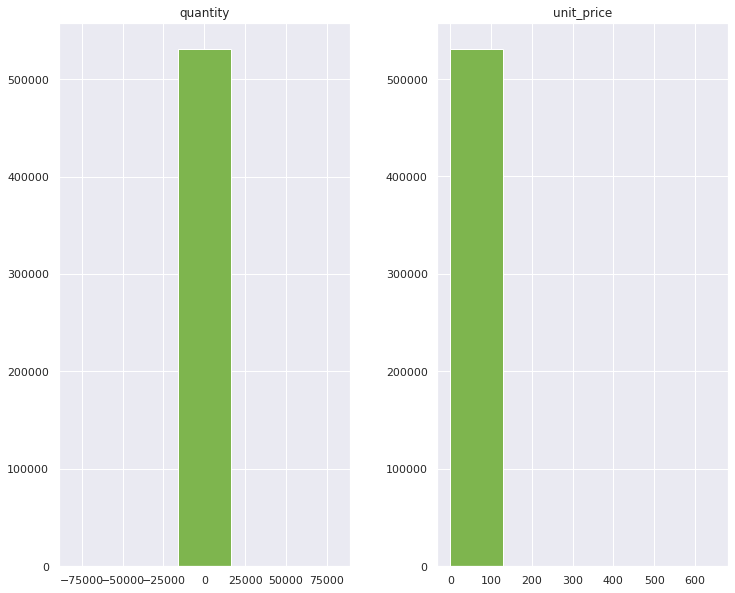

In [50]:
ecomm_clean.hist(column=['quantity', 'unit_price'], color=c, figsize=(12,10), bins=5);

It's impossible to analyze the histogram due to the outliers. Let's explore them.

#### Item price distribution including outliers

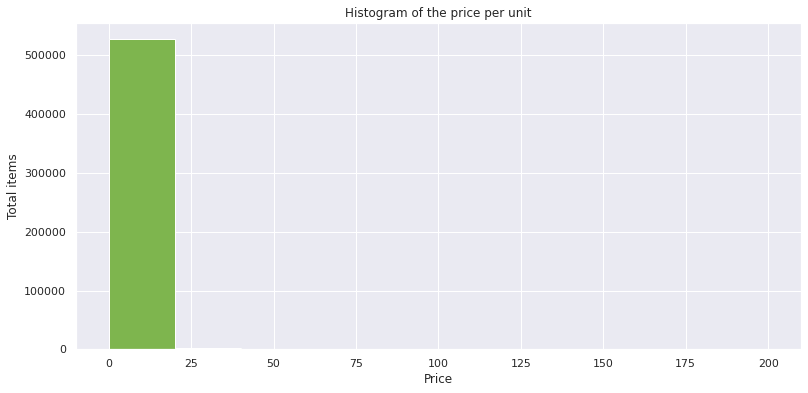

In [51]:
# Let's try to reduce the range
plt.figure(figsize=(13,6))
ecomm_clean['unit_price'].hist(color=c, range=(0, 200))
plt.title('Histogram of the price per unit')
plt.ylabel('Total items')
plt.xlabel('Price');

In [52]:
ecomm_clean['unit_price'].describe()

count    531301.000000
mean          3.304352
std           4.579622
min           0.001000
25%           1.250000
50%           2.080000
75%           4.130000
max         649.500000
Name: unit_price, dtype: float64

Still not very informative. We will find the outliers and exlude them from the distribution.   
25% of the products are 1.25 or less.  
50% of products ar 2.08 or less.  
75% of products are under 4.13.

In [53]:
#function which will identify outliers
def distribution_percentile(parameter):
    """
    The function will:
    1. Print the general information on core parameters' data (statistics) and examine what are
    the outliers. 
    2. Plot a chart for the parameter.
    3. Determine whether theres's a skewness and to which side.
    
    The max border is set to 99th percentile.
    The min border is set to 3rd percentile. 
    The min and max percentiles may be changed later to filter out the outliers.
    """
    print('The histogram of: {}'.format(parameter))
    ecomm_clean[parameter].hist(color=c)
    plt.show()
    if ecomm_clean[parameter].mean()>ecomm_clean[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format(parameter))
    print(ecomm_clean[parameter].describe())
  
    ninety_nine = np.percentile(ecomm_clean[parameter], 99)
    three = np.percentile(ecomm_clean[parameter], 3)
    print('---------------------------------------')
    print('min border:',three)
    print('max border:',ninety_nine)
    print('---------------------------------------')
    print('The outliers are considered to be values below',three, "and above",ninety_nine)
    print('We have',len(ecomm_clean[(ecomm_clean[parameter]<three)|(ecomm_clean[parameter]>ninety_nine)]),"values that we can consider outliers.")

The histogram of: unit_price


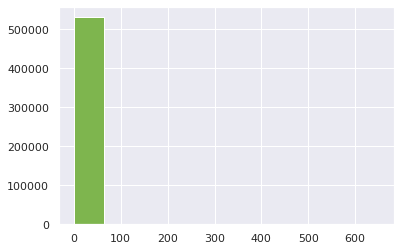

The distribution is skewed to the right
---------------------------------------
Statistics on: unit_price
count    531301.000000
mean          3.304352
std           4.579622
min           0.001000
25%           1.250000
50%           2.080000
75%           4.130000
max         649.500000
Name: unit_price, dtype: float64
---------------------------------------
min border: 0.39
max border: 16.63
---------------------------------------
The outliers are considered to be values below 0.39 and above 16.63
We have 14639 values that we can consider outliers.


In [54]:
#Let's look at the price distribution first
distribution_percentile('unit_price')

In [55]:
#Price outliers
price_upper = np.percentile(ecomm_clean.unit_price, 99)
price_lower = np.percentile(ecomm_clean.unit_price, 3)
print('Price upper limit is', price_upper)
print('Price lower limit is', price_lower)

Price upper limit is 16.63
Price lower limit is 0.39


#### Item quantity distribution including outliers

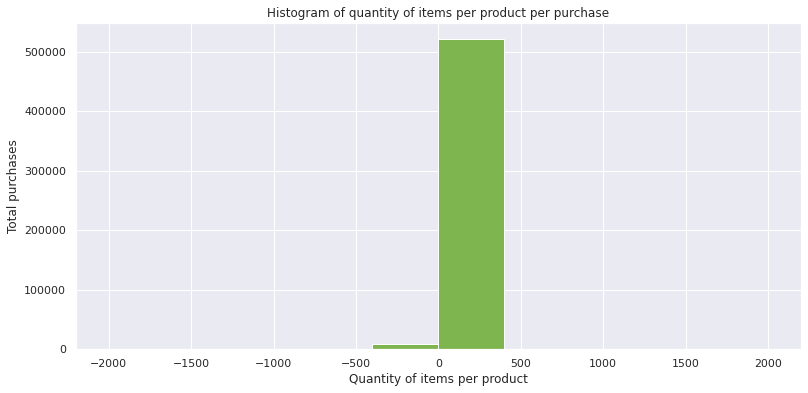

In [56]:
# Let's try to reduce the range
plt.figure(figsize=(13,6))
ecomm_clean['quantity'].hist(color=c, range=(-2000, 2000))
plt.title('Histogram of quantity of items per product per purchase')
plt.ylabel('Total purchases')
plt.xlabel('Quantity of items per product');

In [57]:
ecomm_clean['quantity'].describe()

count    531301.000000
mean          9.959445
std         216.988209
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: quantity, dtype: float64

25% of the products are sold 1 piece or less.  
50% of products are sold 3 pieces or less.  
75% of products are sold 10 pieces or less.

In [58]:
#fuction which will identify outliers
def distribution_percentile(parameter):
    """
    The function will:
    1. Print the general information on core parameters' data (statistics) and examine what are
    the outliers. 
    2. Plot a chart for the parameter.
    3. Determine whether theres's a skewness and to which side.
    
    The max border is set to 95th percentile.
    The min border is set to 3rd percentile. 
    The min and max percentiles may be changed later to filter out the outliers.
    """
    print('The histogram of: {}'.format(parameter))
    ecomm_clean[parameter].hist(color=c)
    plt.show()
    if ecomm_clean[parameter].mean()>ecomm_clean[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format(parameter))
    print(ecomm_clean[parameter].describe())
  
    ninety_five = np.percentile(ecomm_clean[parameter], 95)
    three = np.percentile(ecomm_clean[parameter], 3)
    print('---------------------------------------')
    print('min border:',three)
    print('max border:',ninety_five)
    print('---------------------------------------')
    print('The outliers are considered to be values below',three, "and above",ninety_five)
    print('We have',len(ecomm_clean[(ecomm_clean[parameter]<three)|(ecomm_clean[parameter]>ninety_five)]),"values that we can consider outliers.")

The histogram of: quantity


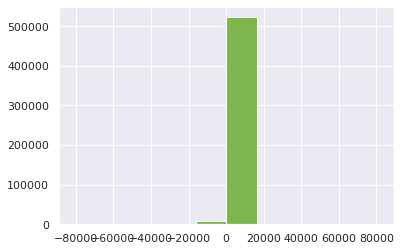

The distribution is skewed to the right
---------------------------------------
Statistics on: quantity
count    531301.000000
mean          9.959445
std         216.988209
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: quantity, dtype: float64
---------------------------------------
min border: 1.0
max border: 30.0
---------------------------------------
The outliers are considered to be values below 1.0 and above 30.0
We have 34254 values that we can consider outliers.


In [59]:
#item quantity distibution
distribution_percentile('quantity')

In [60]:
#Quantity outliers
n_upper = np.percentile(ecomm_clean.quantity, 95)
n_lower = np.percentile(ecomm_clean.quantity, 3)
print('Quantity upper limit is', n_upper)
print('Quantity lower limit is', n_lower)

Quantity upper limit is 30.0
Quantity lower limit is 1.0


#### Number of items per purchase

In [61]:
#calculating total number of items per perchase by month
total_purchase_items = ecomm_clean.groupby(['invoice_month', 'invoice_no'])['quantity'].sum().reset_index()
total_purchase_items.columns = ['month', 'invoice', 'total_items']
total_purchase_items.head()

,month,invoice,total_items
0,2018-11-01,536365,40
1,2018-11-01,536366,12
2,2018-11-01,536367,83
3,2018-11-01,536368,15
4,2018-11-01,536369,3


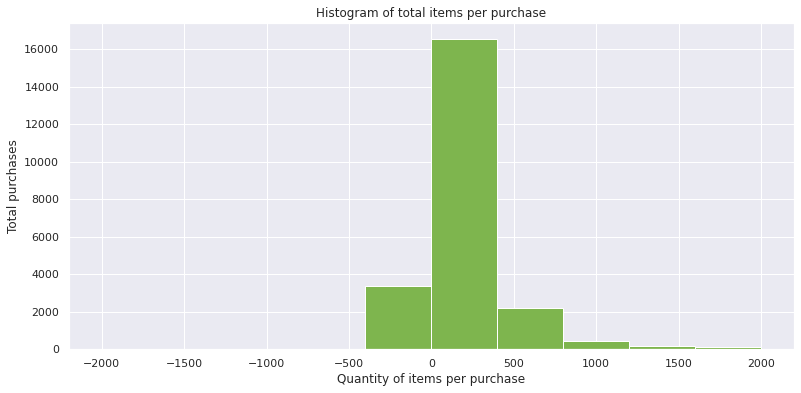

In [62]:
# Let's try to reduce the range
plt.figure(figsize=(13,6))
total_purchase_items['total_items'].hist(color=c, range=(-2000, 2000))
plt.title('Histogram of total items per purchase')
plt.ylabel('Total purchases')
plt.xlabel('Quantity of items per purchase');

In [63]:
total_purchase_items['total_items'].describe()

count    23197.000000
mean       228.109799
std       1153.240041
min     -80995.000000
25%         32.000000
50%        120.000000
75%        260.000000
max      80995.000000
Name: total_items, dtype: float64

25% of purchases are up to 32 items in one purchase.  
50% of purchases are up to 120 items.  
75% of purchases are up to 260 items.
Some items have negative quantity, as we saw from the dataset.

#### Total check per purchase

In [64]:
#calculating total check per perchase by month
total_check = ecomm_clean.groupby(['invoice_month', 'invoice_no'])['total'].sum().reset_index()
total_check.columns = ['month', 'invoice', 'total_check']
total_check.head()

,month,invoice,total_check
0,2018-11-01,536365,139.12
1,2018-11-01,536366,22.20
2,2018-11-01,536367,278.73
3,2018-11-01,536368,70.05
4,2018-11-01,536369,17.85


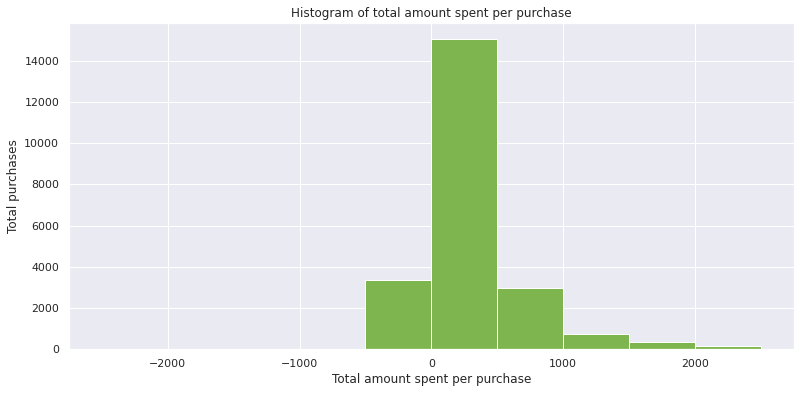

In [65]:
plt.figure(figsize=(13,6))
total_check['total_check'].hist(color=c, range=(-2500, 2500))
plt.title('Histogram of total amount spent per purchase')
plt.ylabel('Total purchases')
plt.xlabel('Total amount spent per purchase');

In [66]:
total_check['total_check'].describe()

count     23197.000000
mean        421.511449
std        2054.152544
min     -168469.600000
25%          88.300000
50%         244.500000
75%         430.500000
max      168469.600000
Name: total_check, dtype: float64

25% of purchases are up to 88.3.  
50% of purchases are up to 244.5.    
75% of purchases are up to 430.5.

#### Total purchase

From the data above we saw that some purchases have negative values. These must be returns. To analyze the purchases only, we will exclude the returns from the dataset.

In [67]:
#merging the total_purchase_items and total_check columns to analyse the complete data on each purchase by month
total_purchase = pd.merge(total_purchase_items, total_check, how='left', on=['month', 'invoice'])
total_purchase.head()

,month,invoice,total_items,total_check
0,2018-11-01,536365,40,139.12
1,2018-11-01,536366,12,22.20
2,2018-11-01,536367,83,278.73
3,2018-11-01,536368,15,70.05
4,2018-11-01,536369,3,17.85


In [68]:
total_purchase_clean = total_purchase.query('total_items > 0 and total_check > 0')
total_purchase_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19776 entries, 0 to 23114
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   month        19776 non-null  datetime64[ns]
 1   invoice      19776 non-null  object        
 2   total_items  19776 non-null  int64         
 3   total_check  19776 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 772.5+ KB


**Number of total purchases by month**

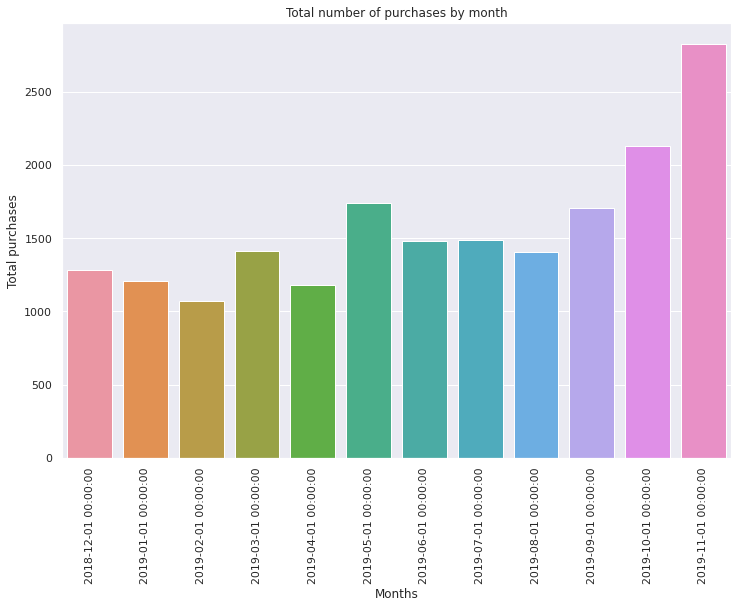

In [69]:
#calculating number of total purchases by month
purchases_per_month = total_purchase_clean.query('"2018-11-01" < month < "2019-12-01"').groupby(['month'])['invoice'].nunique().reset_index()
plt.figure(figsize=(12,8))
ax = sns.barplot(x='month', y='invoice', data=purchases_per_month)
ax.set_xticklabels(purchases_per_month.month,rotation=90)
plt.title('Total number of purchases by month')
plt.ylabel('Total purchases')
plt.xlabel('Months');

- November is the month with the highest number of purchases.
- October is the second month with the highest number of purchases.
- February and April are the month with the lowest number of purchases.
- December is one of the month with lowest number of purchases.

In [70]:
#fuction will identify outlier in total purchases
def distribution_percentile(parameter):
    """
    The function will:
    1. Print the general information on core parameters' data (statistics) and examine what are
    the outliers. 
    2. Plot a chart for the parameter.
    3. Determine whether theres's a skewness and to which side.
    
    The max border is set to 95th percentile.
    The min border is set to 3rd percentile. 
    The min and max percentiles may be changed later to filter out the outliers.
    """
    print('The histogram of: {}'.format(parameter))
    total_purchase_clean[parameter].hist(color=c, figsize=(10,8))
    plt.show()
    if total_purchase_clean[parameter].mean()>total_purchase_clean[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format(parameter))
  
    ninety_five = np.percentile(total_purchase_clean[parameter], 95)
    three = np.percentile(total_purchase_clean[parameter], 3)
    print('---------------------------------------')
    print('min border:',three)
    print('max border:',ninety_five)
    print('---------------------------------------')
    print('The outliers are considered to be values below',three, "and above",ninety_five)
    print('We have',len(total_purchase_clean[(total_purchase_clean[parameter]<three)|(total_purchase_clean[parameter]>ninety_five)]),"values that we can consider outliers.")

The histogram of: total_check


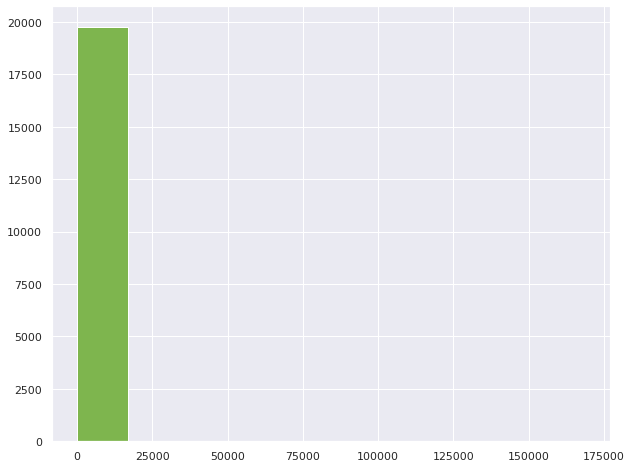

The distribution is skewed to the right
---------------------------------------
Statistics on: total_check
---------------------------------------
min border: 14.212499999999999
max border: 1507.9175000000002
---------------------------------------
The outliers are considered to be values below 14.212499999999999 and above 1507.9175000000002
We have 1583 values that we can consider outliers.


In [71]:
#total check distribution
distribution_percentile('total_check');

The histogram of: total_items


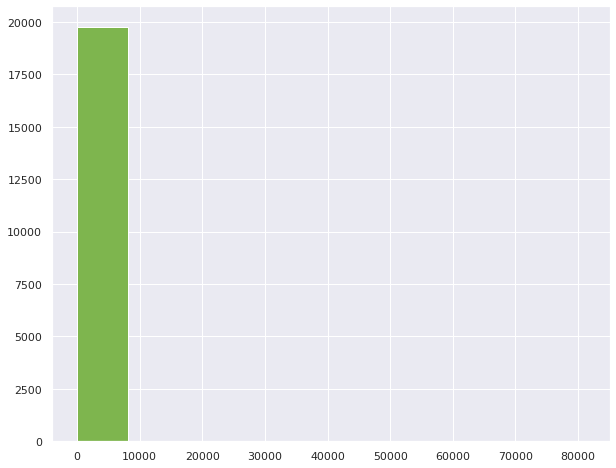

The distribution is skewed to the right
---------------------------------------
Statistics on: total_items
---------------------------------------
min border: 4.0
max border: 810.0
---------------------------------------
The outliers are considered to be values below 4.0 and above 810.0
We have 1479 values that we can consider outliers.


In [72]:
#total number of items per purchase distribution
distribution_percentile('total_items')

#### Core parameters without outliers

In [73]:
#Excluding the outliers from the table
total_purchase_no_outliers = total_purchase.query('4 <= total_items <= 810 and 14.2 <= total_check <= 1508')
total_purchase_no_outliers.head()

,month,invoice,total_items,total_check
0,2018-11-01,536365,40,139.12
1,2018-11-01,536366,12,22.20
2,2018-11-01,536367,83,278.73
3,2018-11-01,536368,15,70.05
5,2018-11-01,536370,446,801.86


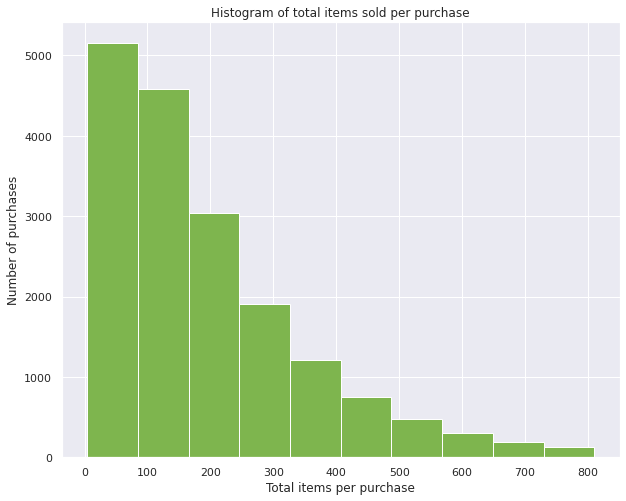

In [74]:
total_purchase_no_outliers.hist('total_items', color=c, figsize=(10,8))
plt.title('Histogram of total items sold per purchase')
plt.xlabel('Total items per purchase')
plt.ylabel('Number of purchases');

In [75]:
total_purchase_no_outliers['total_items'].describe()

count    17733.000000
mean       190.751368
std        156.520115
min          4.000000
25%         73.000000
50%        147.000000
75%        263.000000
max        810.000000
Name: total_items, dtype: float64

Once the outliers have been removed, the disribution of items per purchase is as following:
- Average number of items per purchase is 191.
- 25% of purchases include up to 73 items.
- 50% of purchases include up to 147 items.
- 75% of purchases include up to 263 items.

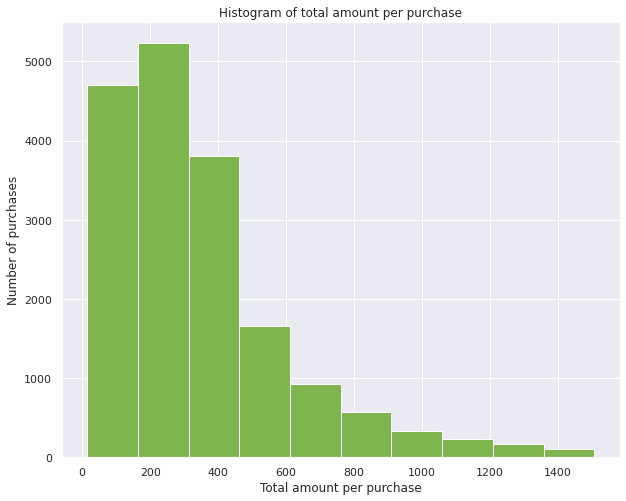

In [76]:
total_purchase_no_outliers.hist('total_check', color=c, figsize=(10,8))
plt.title('Histogram of total amount per purchase')
plt.ylabel('Number of purchases')
plt.xlabel('Total amount per purchase');

In [77]:
total_purchase_no_outliers['total_check'].describe()

count    17733.000000
mean       342.652218
std        260.355147
min         14.250000
25%        157.050000
50%        298.020000
75%        434.960000
max       1506.200000
Name: total_check, dtype: float64

Once the outliers have been removed, the distribution of total amount per purchase is as following:
- Average number of purchase amount is 342.7.
- 25% of purchases are up to 157.
- 50% of purchases are up to 298.
- 75% of purchases are up to 435.

#### Total revenue over time

Since we will be calculating the revenue, we will have to account for returns as well, therefore, we will be making calculation with ecomm_clean_full table.

In [78]:
#calculating total items by month
total_items_by_month = ecomm_clean.groupby(['invoice_month'])['quantity'].sum().reset_index()
total_items_by_month.columns = ['month', 'total_items']
total_items_by_month

,month,total_items
0,2018-11-01,47602
1,2018-12-01,293962
2,2019-01-01,332271
3,2019-02-01,275362
4,2019-03-01,369187
5,2019-04-01,280122
6,2019-05-01,412083
7,2019-06-01,362860
8,2019-07-01,413391
9,2019-08-01,427775


In [79]:
#calculating total revenue by month
total_revenue_by_month = ecomm_clean.groupby(['invoice_month'])['total'].sum().reset_index()
total_revenue_by_month.columns = ['month', 'total_check']
total_revenue_by_month

,month,total_check
0,2018-11-01,103249.920
1,2018-12-01,655517.170
2,2019-01-01,626963.610
3,2019-02-01,494409.010
4,2019-03-01,661057.200
5,2019-04-01,465828.811
6,2019-05-01,775699.960
7,2019-06-01,685947.870
8,2019-07-01,711261.571
9,2019-08-01,731525.140


In [80]:
#merging the complete data on revenue by month
monthly_revenue = pd.merge(total_items_by_month, total_revenue_by_month, how='left', on=['month'])
monthly_revenue.head()

,month,total_items,total_check
0,2018-11-01,47602,103249.92
1,2018-12-01,293962,655517.17
2,2019-01-01,332271,626963.61
3,2019-02-01,275362,494409.01
4,2019-03-01,369187,661057.20


In [81]:
#checking the time range
ecomm_clean['invoice_date'].agg({'min', 'max'})

min   2018-11-29
max   2019-12-07
Name: invoice_date, dtype: datetime64[ns]

We have two incomplete month - Nov 2018 and Dec 2019. We will remove the incomplete months and for the purpose of the analysis and use only month with complete sales data for all the days of the month.

In [82]:
#revenue by month, not including Nov 2018 and Dec 2019
monthly_revenue_clean = monthly_revenue.query('"2018-11-01" < month < "2019-12-01"')
monthly_revenue_clean.columns = ['month', 'items_sold', 'total_revenue']
monthly_revenue_clean

,month,items_sold,total_revenue
1,2018-12-01,293962,655517.170
2,2019-01-01,332271,626963.610
3,2019-02-01,275362,494409.010
4,2019-03-01,369187,661057.200
5,2019-04-01,280122,465828.811
6,2019-05-01,412083,775699.960
7,2019-06-01,362860,685947.870
8,2019-07-01,413391,711261.571
9,2019-08-01,427775,731525.140
10,2019-09-01,524081,947206.101


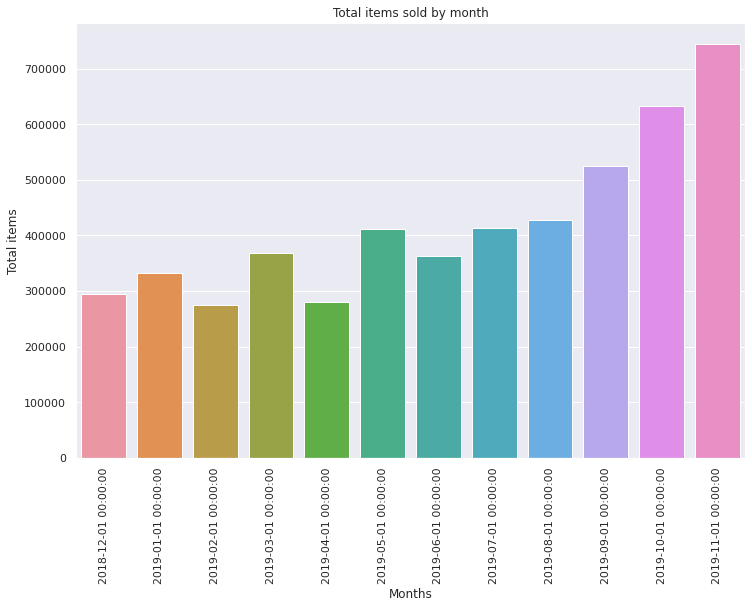

In [83]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='month', y='items_sold', data=monthly_revenue_clean)
ax.set_xticklabels(monthly_revenue_clean.month,rotation=90)
plt.title('Total items sold by month')
plt.ylabel('Total items')
plt.xlabel('Months');

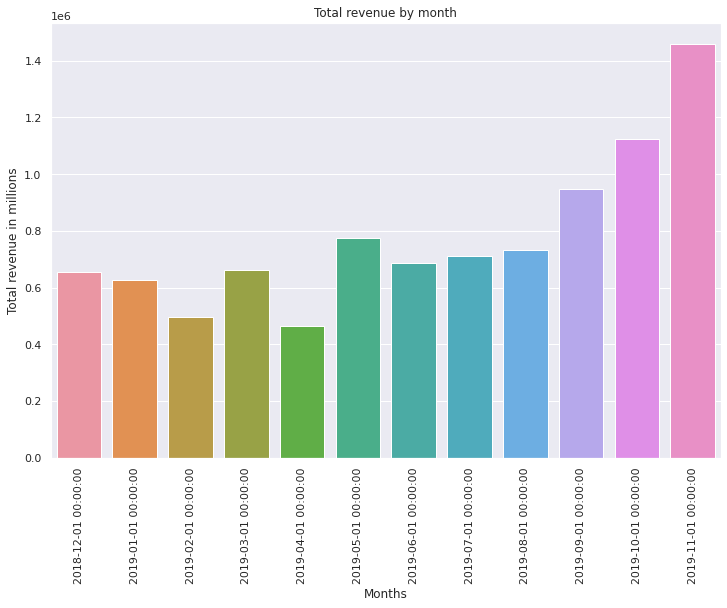

In [84]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='month', y='total_revenue', data=monthly_revenue_clean)
ax.set_xticklabels(monthly_revenue_clean.month,rotation=90)
plt.title('Total revenue by month')
plt.ylabel('Total revenue in millions')
plt.xlabel('Months');

We see a significant increase in the number of sold items and in the total revenuem starting from September. November 2019 had the largest number of sold items and the highest revenue. This may be attributed to Black Friday sales. February and April are the months with the lowest number of sold items and lowest revenue. 
Despite the expectation that there should be an increase in the number of items and revenue in December, just before X-mas, we don't see a significant different in sales during this month. Possible explanation is that buyers purchase X-mas gifts and decorations during Black Friday sales.

#### Scatterplot studying price and item quantity per purchase distribution

In [85]:
total_purchase_no_outliers.head()

,month,invoice,total_items,total_check
0,2018-11-01,536365,40,139.12
1,2018-11-01,536366,12,22.20
2,2018-11-01,536367,83,278.73
3,2018-11-01,536368,15,70.05
5,2018-11-01,536370,446,801.86


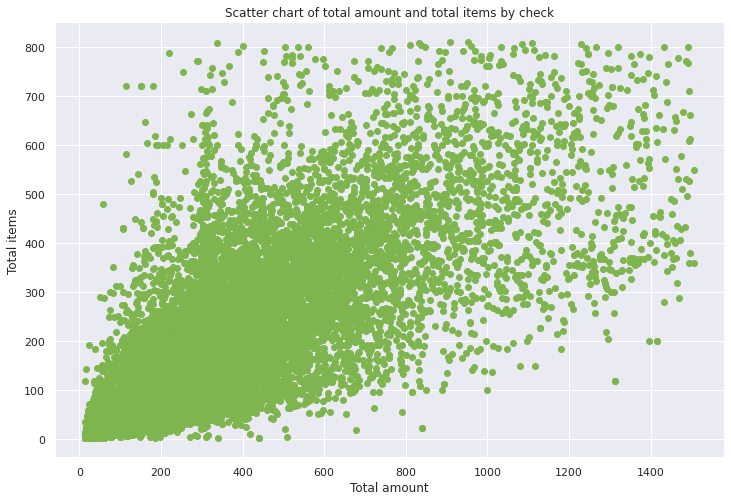

In [86]:
import plotly.express as px
plt.figure(figsize=(12,8))
plt.scatter(x=total_purchase_no_outliers['total_check'], y=total_purchase_no_outliers['total_items'], color=c)
plt.title('Scatter chart of total amount and total items by check')
plt.ylabel('Total items')
plt.xlabel('Total amount');

There's a positive correlation between the total check and the number of items in the purchase. The majority of invoices are up to 400 items and up to about 650.